In [36]:
# Imports
import numpy as np
import plotting_master as pm
import run

# -- Parameters --
number_of_companies = 50
number_of_workers = 5 * number_of_companies 
salary_increase = 0.035
interest_rate_free = 0.0 # "variable" or float
mutation_magnitude = 100 # Float, "spread", "last_T"
salary_min = 1e-2 #mutation_magnitude * 0.1
prob_exponent = 1
warmup_steps = 3000
time_steps = 2000 + warmup_steps 
seed = 300 # np.random.randint(0, 10000)

# Bankruptcy: negative_money, cannot_pay_salary
# mutation: "constant", "spread", "last_T", "minimum", "log", "mean", "worker_opinion", "0_to_mean", "normal", "positive_income"
update_methods = {"worker_update": "limited", 
                  "bankruptcy": "negative_money",
                  "mutation": "positive_income",}


# Create instances
create_data = run.RunWorkForce(number_of_companies, number_of_workers, salary_increase, 
                            interest_rate_free, mutation_magnitude, prob_exponent, salary_min, update_methods, time_steps, seed)
gname = create_data._get_group_name()
plotter = pm.PlotMaster(gname, skip_values=warmup_steps)

### Store values

In [37]:
create_data.store_data_in_group()

Storing data in Steps5000_N50_W250_ds0.035_m100_snewpositive_income_rf0.0_ProbExpo1_smin0.01_seed300


100%|██████████| 4999/4999 [00:00<00:00, 8111.16it/s]


### Density graphs

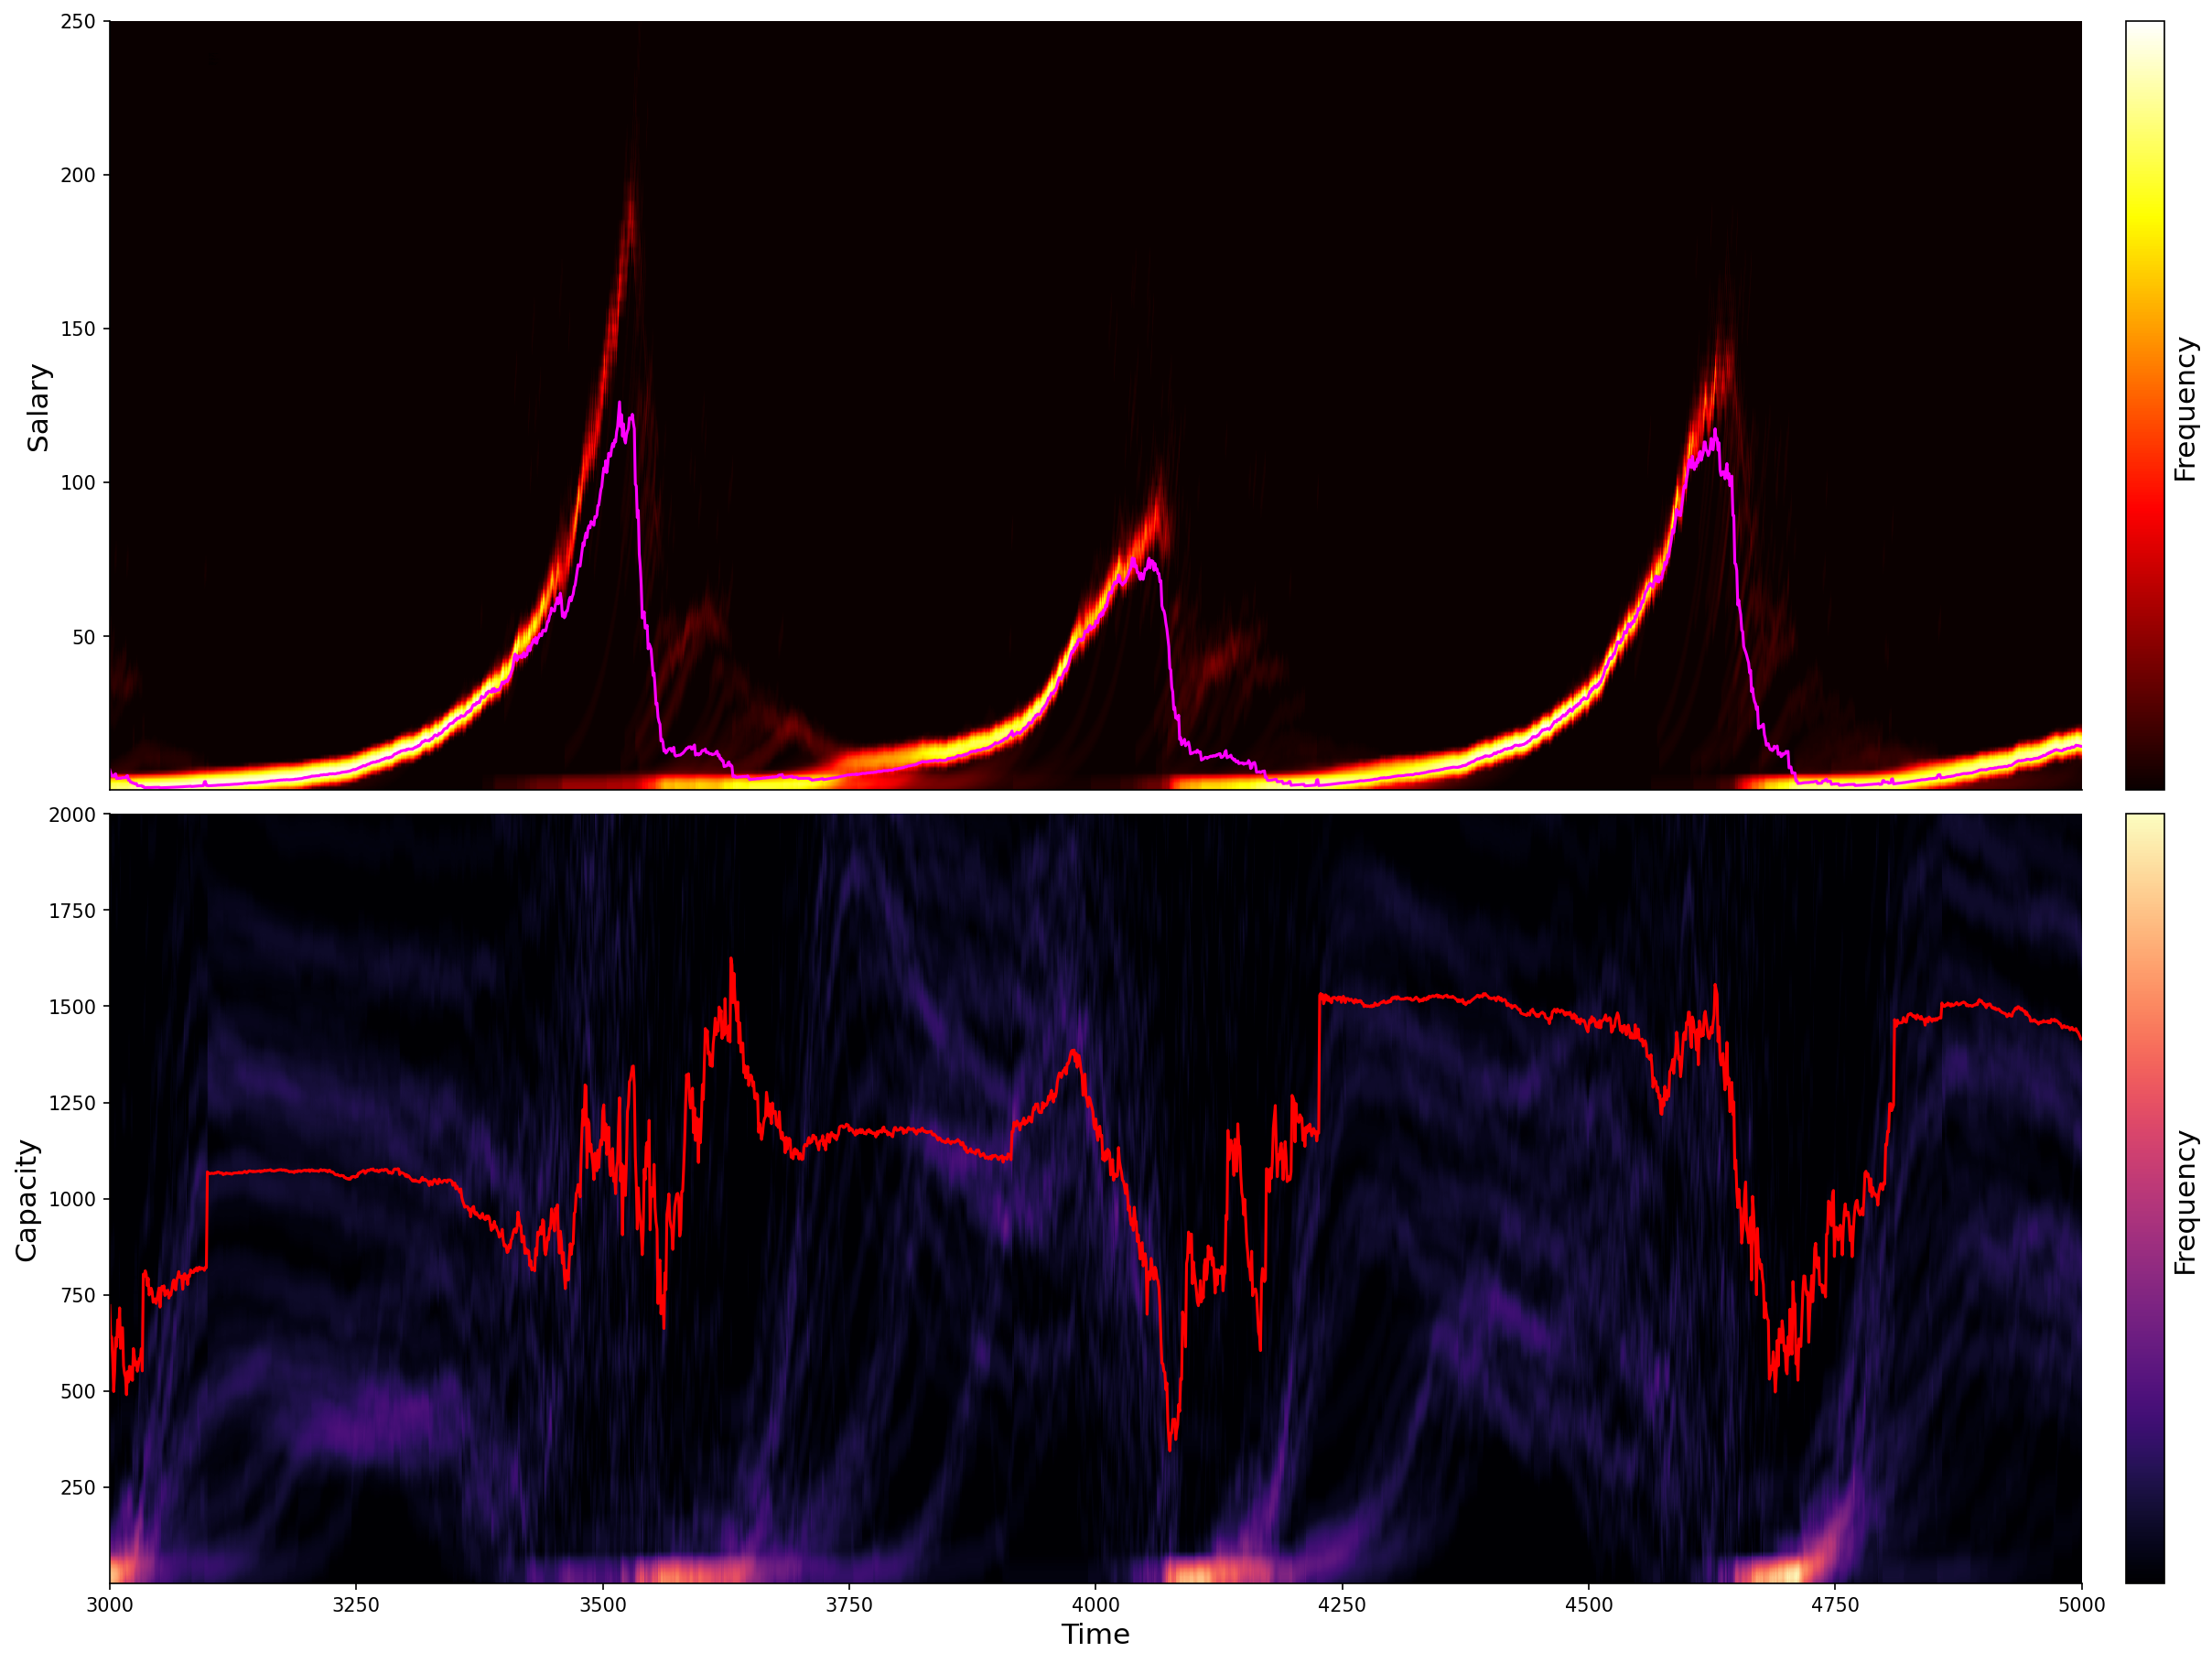

In [42]:
plotter.plot_running_KDE(bandwidth_s=5, bandwidth_d=75, s_lim=(0.01, 250), d_lim=(0.001, 2000), eval_points=200, kernel="epanechnikov", show_mean=True)
# normale bandwidth: 0.0005, 0.15

In [ ]:
plotter.single_KDE(x_data="delta_debt", time_point=70, eval_points=200, bandwidth=0.045, kernel="epanechnikov")

### General behaviour

In [ ]:
plotter.plot_salary(show_spread=False)

In [ ]:
plotter.plot_debt()

In [ ]:
plotter.plot_single_companies(N_plot=6)

In [ ]:
plotter.plot_salary_and_debt_distributions()

### Niche behaviour graphs

In [ ]:
plotter.plot_mutations()

In [ ]:
plotter.plot_bankrupt_new_salary()

In [ ]:
plotter.animate_w0_wnon0(skip_time_steps=5);

In [ ]:
plotter.plot_time_from_income_change_to_bankruptcy_distribution(show_plot=False)

In [ ]:
plotter.plot_survivors(show_peak_plot=False)

### Parameter investigations

In [ ]:
# Create all datasets and store them. Does not store group names
# create_data.repeated_m_runs(N_repeat=10, m_values=m_values)
# create_data.multiple_s_min_runs(s_min_list=np.geomspace(1e-8, 5e-2, 8))

In [9]:
# Get group name list
# Mutation size
m_values = [0.1, 0.5, 1, 5, 10, 25, 50, 75, 100]
group_name_list_mutation = []
for m in m_values:
    create_data.mutation_magnitude = m
    # create_data.salary_min = m / 10
    group_name_list_mutation.append(create_data._get_group_name())
# Reset m
create_data.mutation_magnitude = mutation_magnitude
create_data.salary_min = salary_min

# Prob exponent
prob_exponent_values = [0, 1, 2, 4, 6, 8]
group_name_list_prob_expo = []
for exponent in prob_exponent_values:
    create_data.prob_exponent = exponent
    group_name_list_prob_expo.append(create_data._get_group_name())
# Reset exponent
create_data.prob_exponent = prob_exponent

# ds 
ds_values = np.linspace(0.005, 0.1, 10)
group_name_list_ds = []
for ds in ds_values:
    create_data.ds = ds
    group_name_list_ds.append(create_data._get_group_name())
# Reset ds
create_data.ds = salary_increase

# N variable, W const
NW_const = 250
NW_variable = np.array([25, 50, 100, 250, 500, 1000])

# Ratio constant N / W
N_W_ratio = 0.75
W_values_ratio = np.round(N_W_ratio * NW_variable, 0).astype(np.int32)

group_name_list_N_var_W_const = []
group_name_list_N_const_W_var = []
group_name_list_N_W_ratio = []

# Run N variable, W constant
create_data.W = NW_const
for N in NW_variable:
    create_data.N = N
    group_name_list_N_var_W_const.append(create_data._get_group_name())

# Run N constant, W variable
create_data.N = NW_const
for W in NW_variable:
    create_data.W = W
    group_name_list_N_const_W_var.append(create_data._get_group_name())

# Run N / W ratio
for N, W in zip(NW_variable, W_values_ratio):
    create_data.N = N
    create_data.W = W
    group_name_list_N_W_ratio.append(create_data._get_group_name())
    
# Reset N and W
create_data.N = number_of_companies
create_data.W = number_of_workers

In [10]:
# # Store data
for m in m_values:
    print("m = ", m)
    create_data.mutation_magnitude = m
    # create_data.salary_min = m / 10
    create_data.store_data_in_group()
create_data.mutation_magnitude = mutation_magnitude
create_data.salary_min = salary_min

# # Store Prob exponent data
# for expo in prob_exponent_values:
#     print("expo = ", expo) 
#     create_data.prob_exponent = expo
#     create_data.store_data_in_group()
    
# Store ds data
# for ds in ds_values:
#     print(f"ds = {ds:.4f}")
#     create_data.ds = ds
#     create_data.store_data_in_group()
# create_data.ds = salary_increase      

# Store N variable, W const
# print("Running N variable, W constant")
# create_data.W = NW_const
# for N in NW_variable:
#     print("N = ", N, "W = ", NW_const)
#     create_data.N = N
#     create_data.store_data_in_group()

# # Store N const, W variable
# print("\nRunning N constant, W variable")
# print("")
# create_data.N = NW_const
# for W in NW_variable:
#     print("N = ", NW_const, "W = ", W)
#     create_data.W = W
#     create_data.store_data_in_group()

# Store N / W ratio
# print("\nRunning N/W ratio")
# for N, W in zip(NW_variable, W_values_ratio):
#     print("N = ", N, "W = ", W)
#     create_data.N = N
#     create_data.W = W
#     create_data.store_data_in_group()
# create_data.N = number_of_companies
# create_data.W = number_of_workers

m =  0.1
Storing data in Steps7000_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo1_smin0.010000000000000002_seed300


100%|██████████| 6999/6999 [00:00<00:00, 7956.31it/s]


m =  0.5
Storing data in Steps7000_N50_W250_ds0.035_m0.5_snewpositive_income_rf0.0_ProbExpo1_smin0.010000000000000002_seed300


100%|██████████| 6999/6999 [00:00<00:00, 7936.66it/s]


m =  1
Storing data in Steps7000_N50_W250_ds0.035_m1_snewpositive_income_rf0.0_ProbExpo1_smin0.010000000000000002_seed300


100%|██████████| 6999/6999 [00:00<00:00, 8046.17it/s]


m =  5
Storing data in Steps7000_N50_W250_ds0.035_m5_snewpositive_income_rf0.0_ProbExpo1_smin0.010000000000000002_seed300


100%|██████████| 6999/6999 [00:00<00:00, 8184.38it/s]


m =  10
Storing data in Steps7000_N50_W250_ds0.035_m10_snewpositive_income_rf0.0_ProbExpo1_smin0.010000000000000002_seed300


100%|██████████| 6999/6999 [00:00<00:00, 7318.63it/s]


m =  25
Storing data in Steps7000_N50_W250_ds0.035_m25_snewpositive_income_rf0.0_ProbExpo1_smin0.010000000000000002_seed300


100%|██████████| 6999/6999 [00:00<00:00, 8043.94it/s]


m =  50
Storing data in Steps7000_N50_W250_ds0.035_m50_snewpositive_income_rf0.0_ProbExpo1_smin0.010000000000000002_seed300


100%|██████████| 6999/6999 [00:00<00:00, 8290.50it/s]


m =  75
Storing data in Steps7000_N50_W250_ds0.035_m75_snewpositive_income_rf0.0_ProbExpo1_smin0.010000000000000002_seed300


100%|██████████| 6999/6999 [00:00<00:00, 7864.18it/s]


m =  100
Storing data in Steps7000_N50_W250_ds0.035_m100_snewpositive_income_rf0.0_ProbExpo1_smin0.010000000000000002_seed300


100%|██████████| 6999/6999 [00:00<00:00, 8065.84it/s]


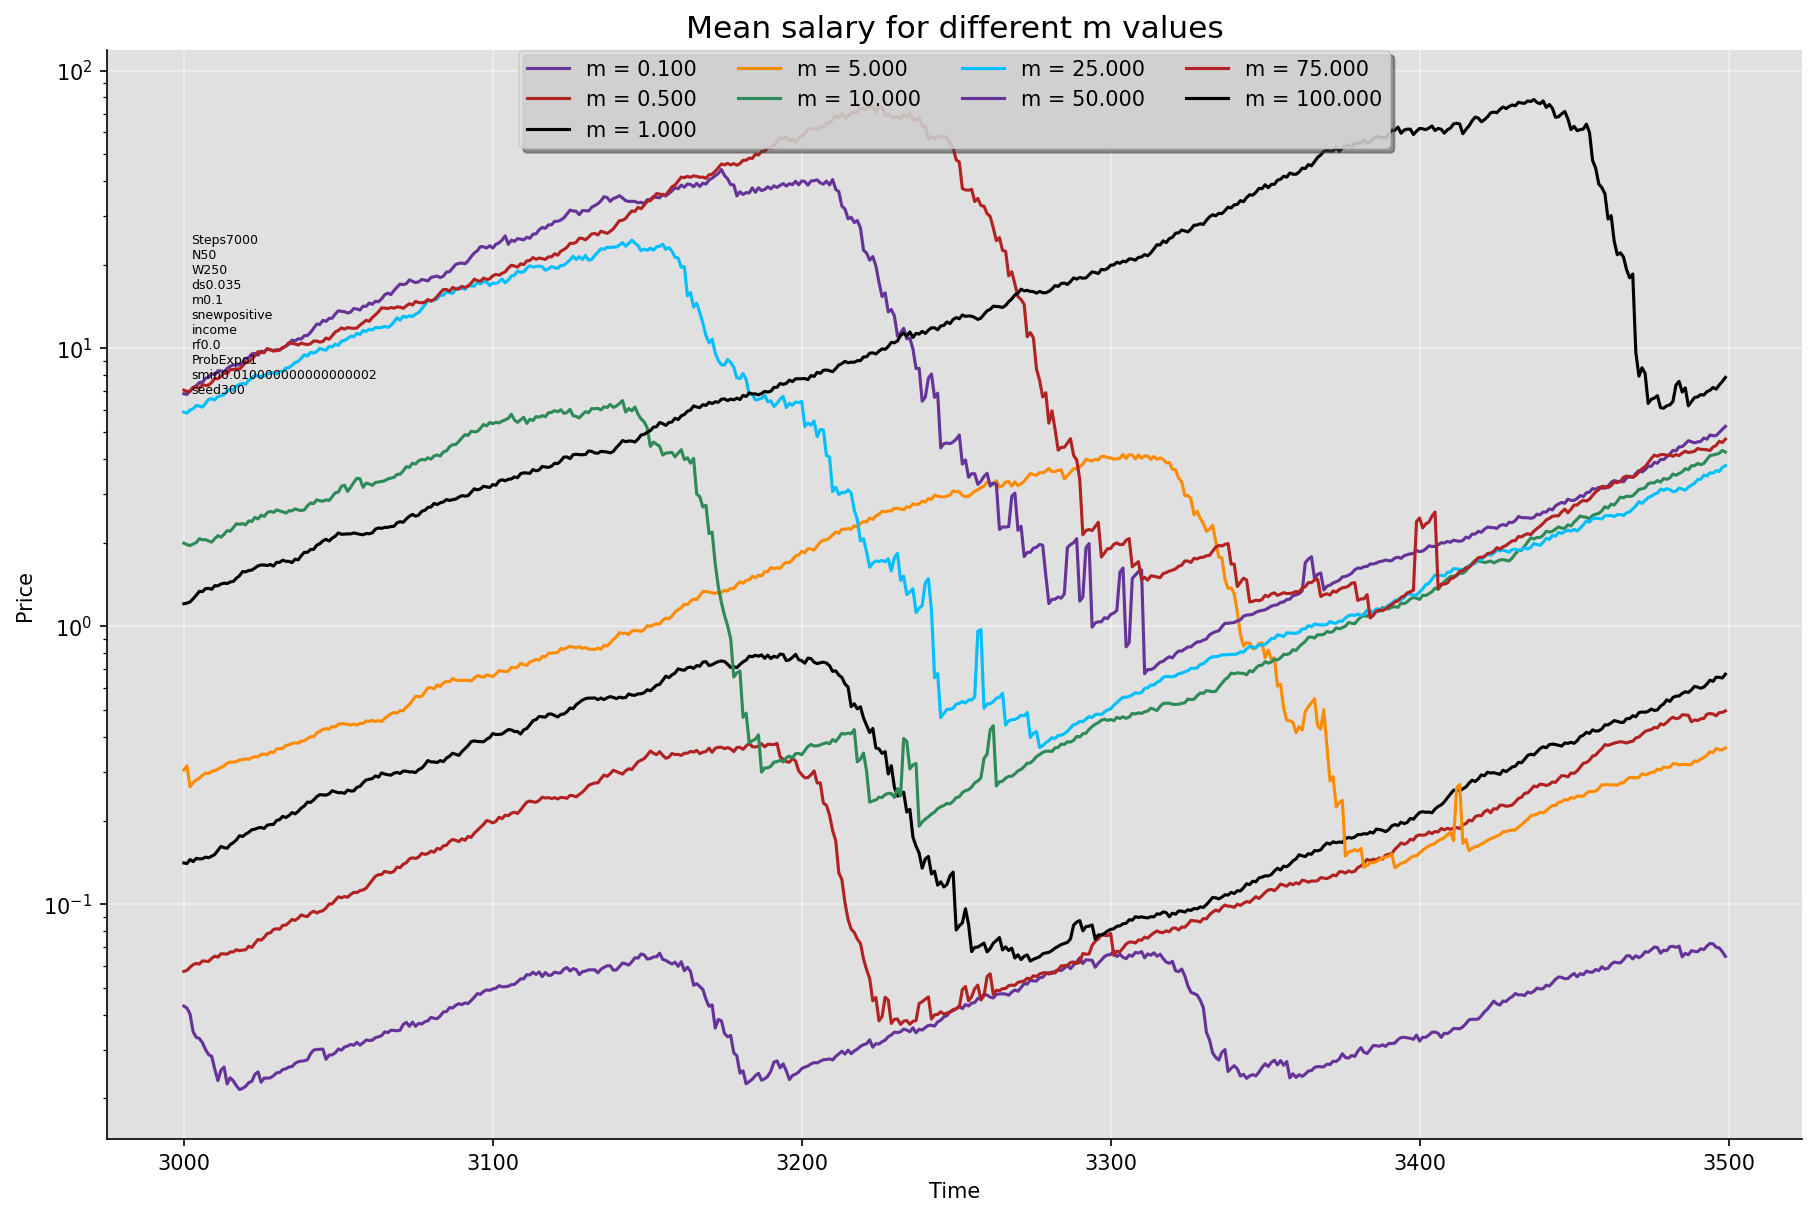

$a = $ -0.000 $\pm$ 0.000, $b = $ 0.00 $\pm$ 0.00045


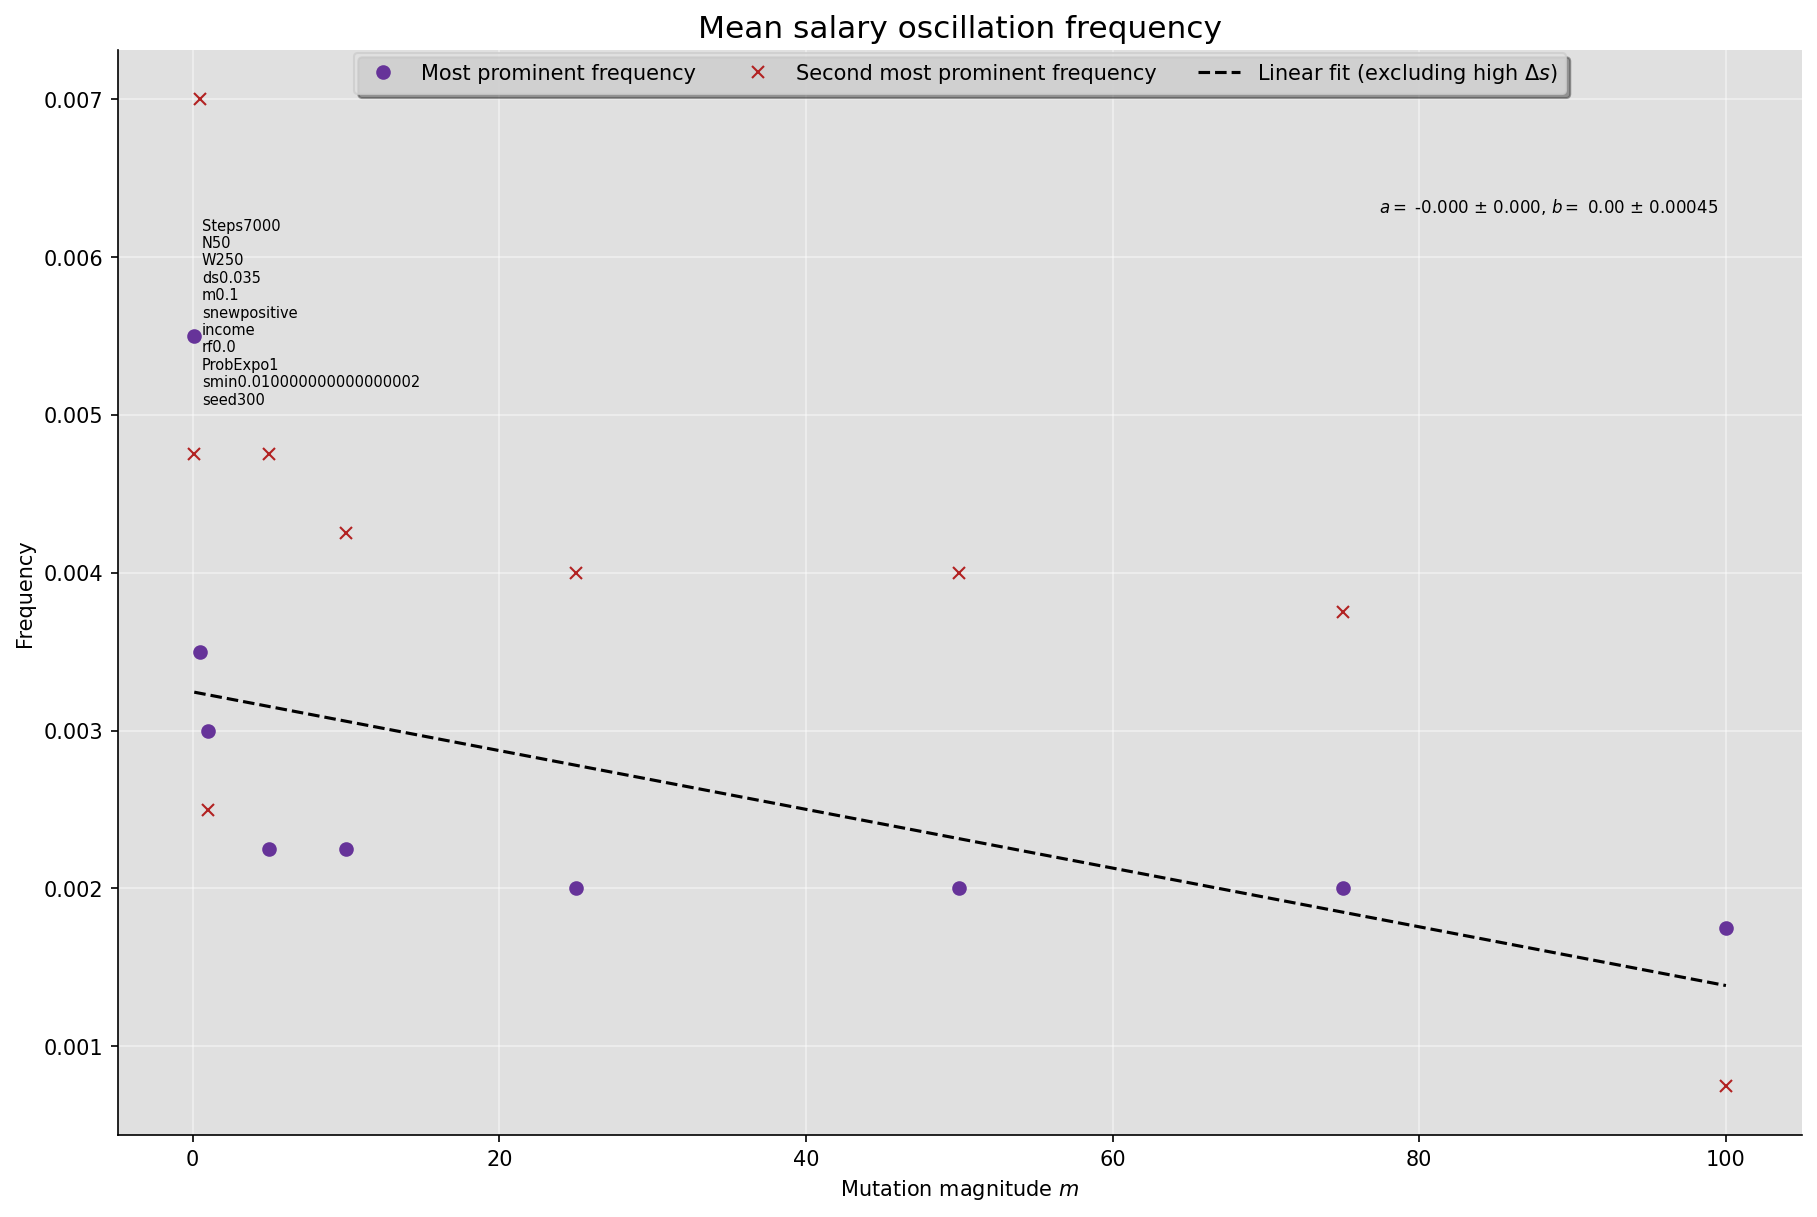

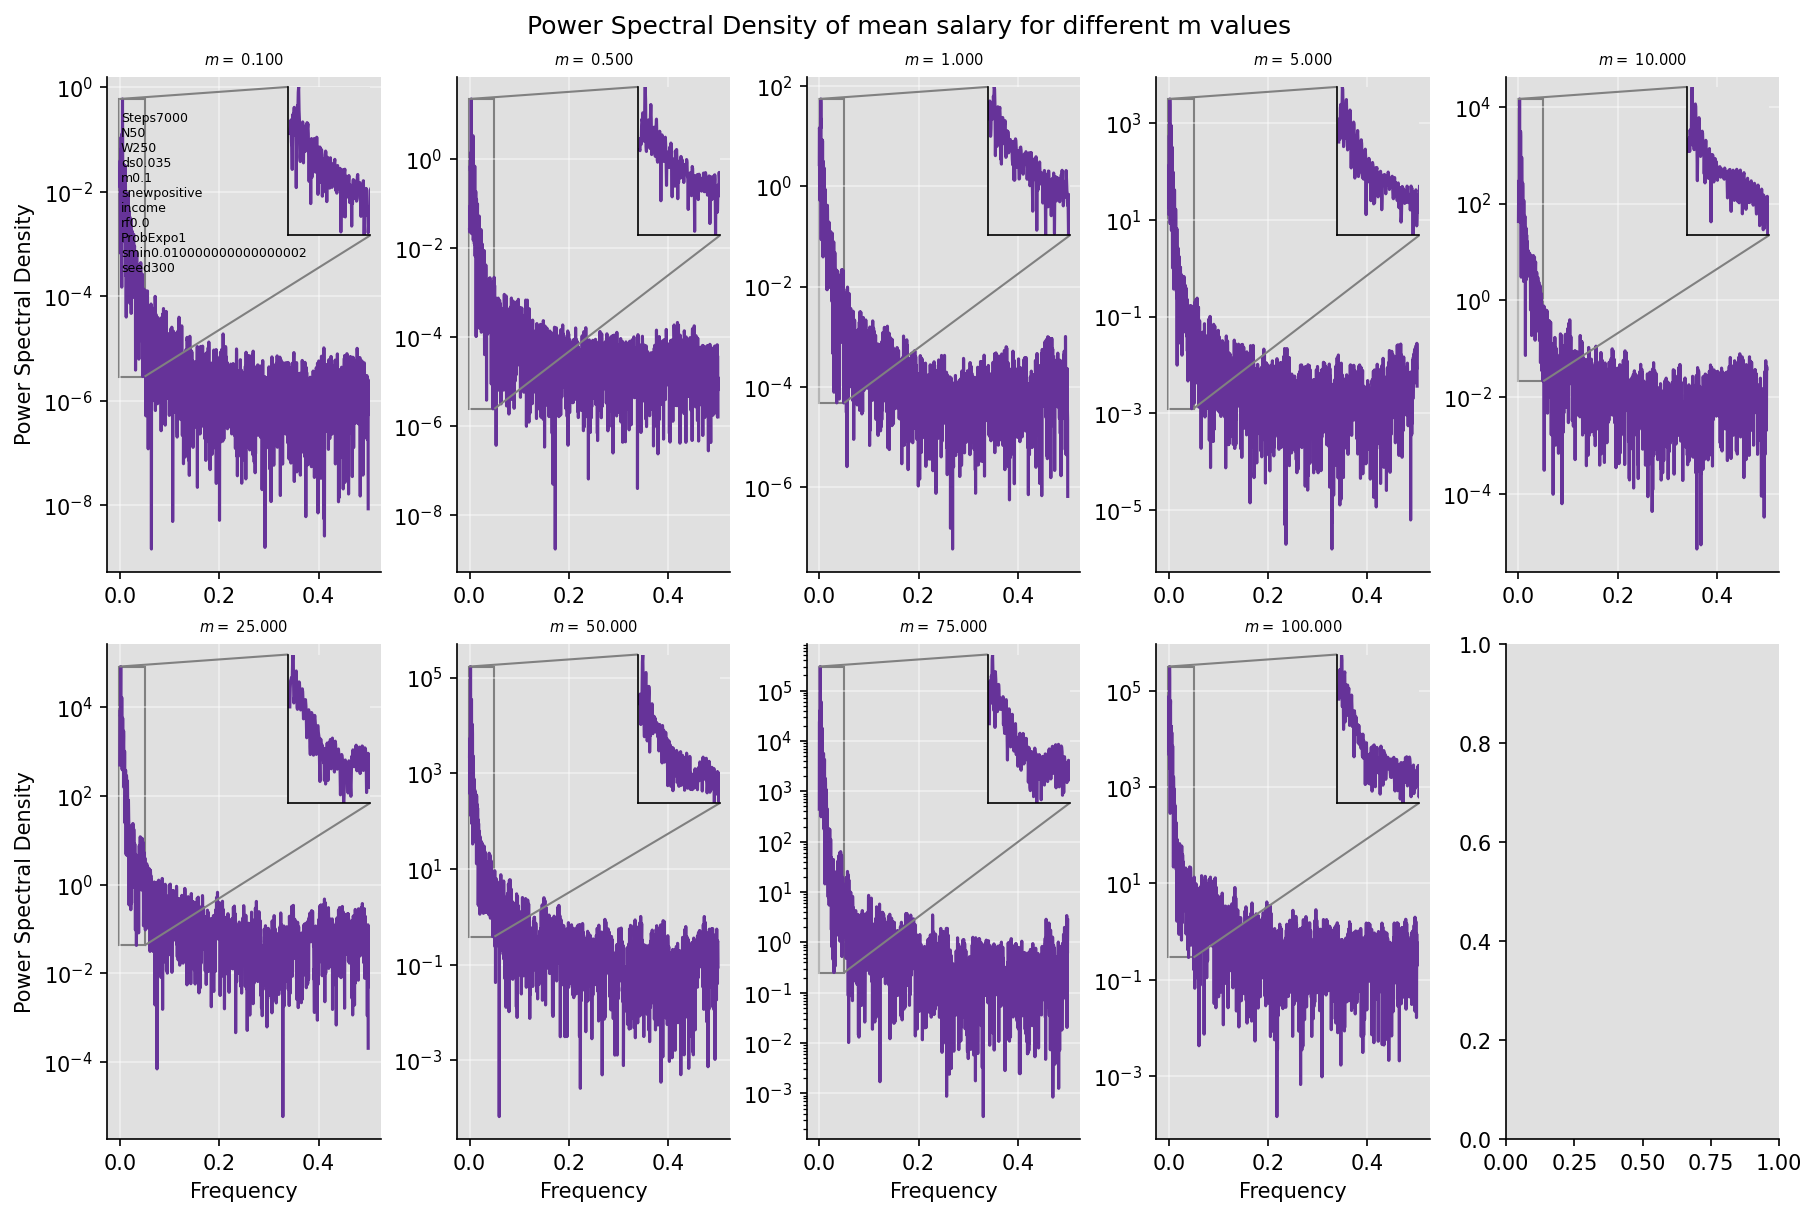

In [11]:
# -- Mutation size investigation -- 
plotter.plot_multiple_m(group_name_list_mutation, same_plot=True)
plotter.plot_m_frequency(group_name_list_mutation)
plotter.plot_m_power_spectrum(group_name_list_mutation)

# plotter.plot_min_max_vs_m()


In [ ]:
# -- ds investigation --

plotter.plot_multiple_ds(group_name_list_ds, same_plot=False)
plotter.plot_ds_frequency(group_name_list_ds)
plotter.plot_ds_power_spectrum(group_name_list_ds)

In [ ]:
plotter.plot_multiple_s_min()

In [ ]:
plotter.plot_N_var_W_const(group_name_list_N_var_W_const)
plotter.plot_N_W_ratio(group_name_list_N_W_ratio)
plotter.plot_N_const_W_var(group_name_list_N_const_W_var)

In [ ]:
# plotter.plot_multiple_prob_expo(group_name_list_prob_expo)